<a href="https://colab.research.google.com/github/uoahy-6uoas/HG-Machine/blob/main/hg4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

keywords = 확률적경사하강법, 손실함수, 에포크

**확률적 경사 하강법**<br>
(훈련데이터가 한번에 준비되는 것이 아니라 점진적으로 늘어가는 상황)
> **확률적 경사하강법(SGD)**은 데이터 세트 내의 각 사례에 대해 훈련 에포크를 실행하고 한 번에 하나씩 각 훈련 사례의 매개변수를 업데이트합니다 *IBM*

*경사하강법은 점진적학습의 알고리즘 중 대표적인 하나*

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
#SGDClassifier = Stochastic Gradient Descent Classifier = 확률적 경사 하강법 근데 이제 분류하는
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log',max_iter=10) #손실함수는 로그, 반복10번
sc.fit(train_scaled, train_target)
sc.score(train_scaled,train_target), sc.score(test_scaled,test_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.7815126050420168, 0.825)

In [6]:
#partial_fit : 1에포크씩 이어서 훈련함
sc.partial_fit(train_scaled,train_target)
sc.score(train_scaled,train_target),sc.score(test_scaled,test_target) #더 훈련해야겠지만 얼마나 더? 과대&과소 적합되지 않도록 적.당.히.

(0.7058823529411765, 0.675)

In [7]:
#과대적합되기 전에 조기종료 시켜보자
import numpy as np
sc = SGDClassifier()
train_score, test_score = [], []
classes = np.unique(train_target) #target names

In [8]:
for _ in range(300):
  sc.partial_fit(train_scaled,train_target, classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled, test_target))

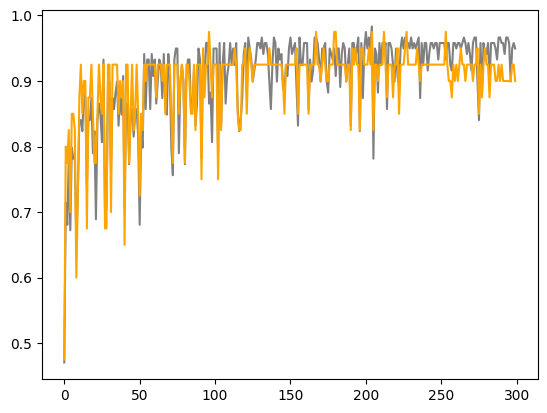

In [9]:
import matplotlib.pyplot as plt
plt.plot(train_score,color='grey')
plt.plot(test_score, color='orange')
#x값은 자동으로 0~len(train_score), 지금은 epoch를 의미
plt.show()
#wow..dats awesome

In [11]:
#대충 150번째부터 수렴하는 듯?
sc = SGDClassifier(max_iter=150,loss='log') #SGDClassifier는 일정 에포크동안 성능이 향상되지 않으면 자동으로 학습 멈춤, 단 max_iter!=none 이면 max_iter만큼 무조건 반복
sc.fit(train_scaled,train_target)
sc.score(train_scaled,train_target), sc.score(test_scaled, test_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


(0.8823529411764706, 0.9)

확인문제
1. 표준화 같은 데이터 전처리를 수행하지 않아도 되는 방식으로 구현된 클래스는 선형회귀
2. 경사 하강법 알고리즘의 하나로 훈련세트에서 몇개릐 샘플을 뽑아서 훈련하는 방식은 미니배치 경사 하강법